# Guia Didático: Testes da API Nano Banana Service
Este notebook orienta, passo a passo, como exercitar cada endpoint da API em `http://localhost:8000`.
- Certifique-se de que o servidor está rodando localmente.
- Sempre que precisarmos de uma imagem de usuário, usaremos `images/valentim.JPG`.
- Para exemplos de produto (quando necessário), usaremos `images/relogio.png`.

In [1]:
# Imports e utilitários
import requests, json, base64
from io import BytesIO
from PIL import Image
from IPython.display import display, Markdown
from pathlib import Path

def display_base64_image(image_base64: str):
    img_bytes = base64.b64decode(image_base64)
    img = Image.open(BytesIO(img_bytes))
    display(img)
    return img

def save_base64_image(image_base64: str, filename: str):
    img_bytes = base64.b64decode(image_base64)
    with open(filename, "wb") as f:
        f.write(img_bytes)
    return Path(filename).resolve()

def read_image_bytes(path: str) -> bytes:
    with open(path, "rb") as f:
        return f.read()

In [2]:
# Configurações padrão para os testes
API_BASE = "http://34.61.215.100:8080"
# API_BASE = "http://localhost:8080"

USER_IMAGE = "images/valentim.JPG"
PRODUCT_IMAGE = "images/relogio.png"
MODEL_NAME = "gemini-2.5-flash-image-preview"

print("Base:", API_BASE)
print("Imagem de usuário:", USER_IMAGE)
print("Imagem de produto:", PRODUCT_IMAGE)

Base: http://34.61.215.100:8080
Imagem de usuário: images/valentim.JPG
Imagem de produto: images/relogio.png


In [3]:
# 1) Health check
url = f"{API_BASE}/health"
resp = requests.get(url)
print(resp.status_code, resp.text)
assert resp.status_code == 200

200 {"status":"healthy"}


In [4]:
# 2) Listar produtos
url = f"{API_BASE}/products"
resp = requests.get(url)
print("Status:", resp.status_code)
data = resp.json() if resp.ok else {}
products = data.get("products", [])
print(f"Produtos encontrados: {len(products)}")
if products:
    print("Primeiro produto:", json.dumps(products[0], ensure_ascii=False, indent=2))

Status: 200
Produtos encontrados: 9
Primeiro produto: {
  "id": "OLJCESPC7Z",
  "name": "Sunglasses",
  "description": "Add a modern touch to your outfits with these sleek aviator sunglasses.",
  "price": "19",
  "picture": "/static/img/products/sunglasses.jpg",
  "categories": [
    "accessories"
  ]
}


In [5]:
# 3) Buscar produto por nome (ex.: 'Sunglasses')
product_name = "Sunglasses"
url = f"{API_BASE}/products-name/{product_name}"
resp = requests.get(url)
print("Status:", resp.status_code)
data = resp.json() if resp.ok else {}
by_name = data.get("products", [])
print(f"Produtos encontrados com nome '{product_name}': {len(by_name)}")
if by_name:
    print(json.dumps(by_name[0], ensure_ascii=False, indent=2))

Status: 200
Produtos encontrados com nome 'Sunglasses': 1
{
  "id": "OLJCESPC7Z",
  "name": "Sunglasses",
  "description": "Add a modern touch to your outfits with these sleek aviator sunglasses.",
  "price": "19",
  "picture": "/static/img/products/sunglasses.jpg",
  "categories": [
    "accessories"
  ]
}


Status: 200


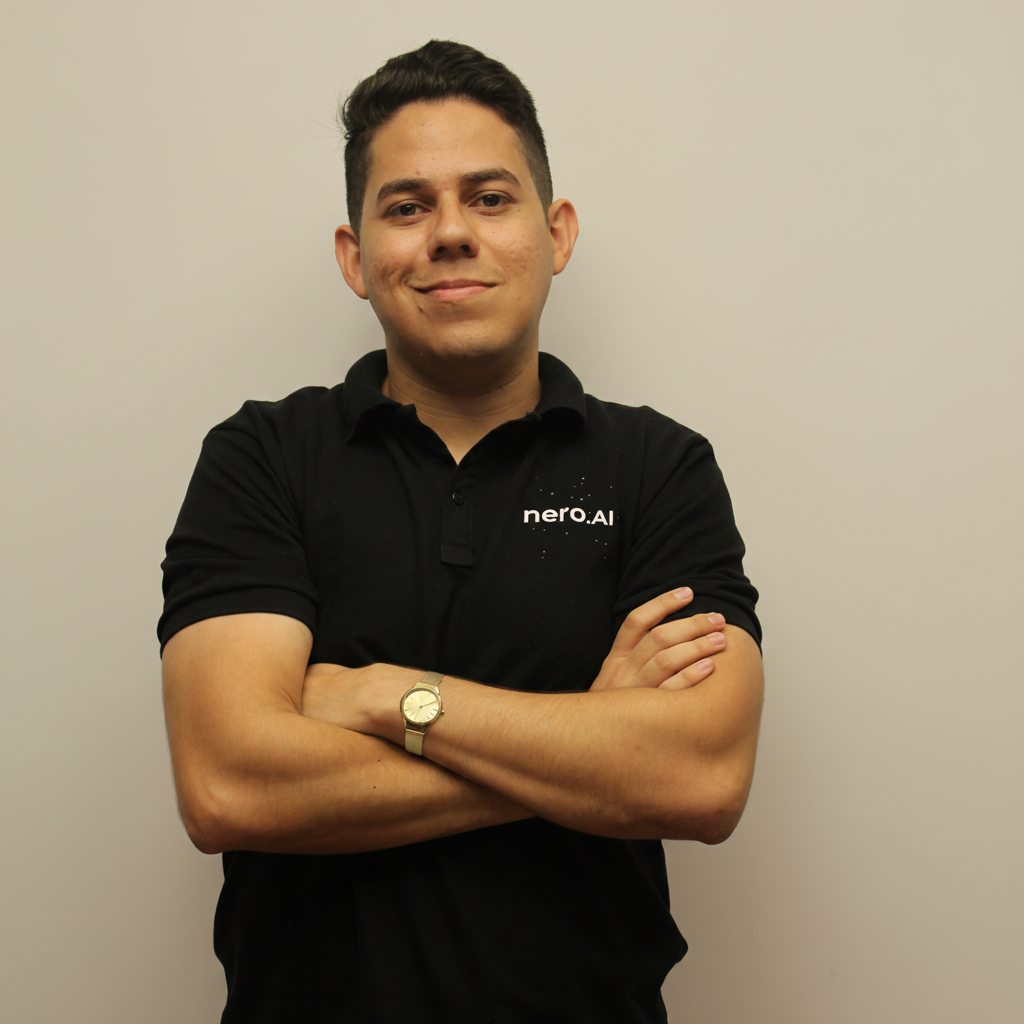

In [6]:
# 4) Remix de imagens (usuário + produto)
url = f"{API_BASE}/remix-images"
prompt = "Faz um mix das imagens. Coloque o relógio no pulso do rapaz de forma natural."
files = {
    'image1': ('valentim.JPG', read_image_bytes(USER_IMAGE), 'image/jpeg'),
    'image2': ('relogio.png', read_image_bytes(PRODUCT_IMAGE), 'image/png'),
}
data = {'prompt': prompt, 'stream': False}
resp = requests.post(url, files=files, data=data)
print("Status:", resp.status_code)
if resp.ok:
    # Exibe diretamente a imagem binária retornada deste endpoint
    from IPython.display import Image as IPyImage
    display(IPyImage(resp.content))
else:
    print(resp.text)

In [7]:
# 5) Descrever imagem (product/person)
url = f"{API_BASE}/describe-image"
files = {'image': ('valentim.JPG', read_image_bytes(USER_IMAGE), 'image/jpeg')}
params = {'type_prompt': 'person'}
resp = requests.post(url, files=files, data=params)
print("Status:", resp.status_code)
if resp.ok:
    print(resp.json())
else:
    print(resp.text)

Status: 200
{'image_id': '1758409641_9113b7c5', 'description': 'A imagem mostra um homem vestindo uma camiseta polo preta. A camiseta tem um colarinho preto e abotoamento com dois botões, também pretos, parcialmente visíveis. O tecido da camiseta parece ser de algodão ou um misto, com uma textura suave e fosca. As mangas são curtas e ajustadas ao braço do homem.\n\nNo lado esquerdo do peito (direito para quem vê a imagem), há um logotipo ou nome de produto em letras brancas. O texto é "nero.AI".\n\nA funcionalidade ou uso principal da camiseta é vestuário. Os detalhes visuais relevantes são o colarinho, os botões e o logotipo "nero.AI" no peito. O homem está de pé, com os braços cruzados sobre o peito.'}


In [8]:
# 6) Assistant Fashion (elogios e dicas de moda)
url = f"{API_BASE}/assistant-fashion"
files = {'image': ('valentim.JPG', read_image_bytes(USER_IMAGE), 'image/jpeg')}
resp = requests.post(url, files=files)
print("Status:", resp.status_code)
if resp.ok:
    data = resp.json()
    print("Image ID:", data.get("image_id"))
    print("Descrição:\n", data.get("description"))
else:
    print(resp.text)

Status: 200
Image ID: 1758409647_987f0120
Descrição:
 Uau, que ótima escolha! Essa polo preta é a definição de uma peça-chave essencial e você a veste com uma confiança que já diz tudo. Vamos ver como esse item pode se tornar a base para looks incríveis que refletem seu estilo.

### Por que essa Polo Preta é Perfeita para Você:

*   **Contraste e Sofisticação:** A cor preta cria um contraste poderoso e elegante com o seu tom de pele, destacando seus traços e seu sorriso. É uma cor que transmite segurança e seriedade na medida certa.
*   **Caimento Ideal:** O corte da polo parece valorizar sua silhueta, especialmente na região dos braços e ombros, projetando uma imagem forte e moderna.
*   **Estilo Versátil:** Você tem uma aparência prática e contemporânea. Essa polo é a ponte perfeita entre o casual e o arrumado, ideal para quem, como você, quer estar bem-vestido sem esforço.

### Eleve seu Estilo: Dicas para Combinar sua Polo

Essa peça é um verdadeiro camaleão no guarda-roupa. Veja c

Status: 200


**Image ID:** 1758409686_d1aee38c

**Texto de venda gerado:**

Uau! Que visão de verão! 😎 O óculos de sol modelo aviador ficou simplesmente espetacular em você. A forma como ele se ajusta ao seu rosto, emoldurando-o perfeitamente, é incrível. A armação preta e as lentes escuras adicionam um toque de mistério e muita sofisticação, combinando com o seu cabelo e realçando a sua atitude confiante.

Com estes óculos, você não só estará super estiloso para o verão, mas também protegido e pronto para qualquer ocasião, seja um passeio na praia, um almoço descontraído ou até mesmo um evento mais sofisticado ao ar livre. Eles trazem uma modernidade imediata ao seu visual, elevando seu estilo a um novo nível.

Esses óculos de sol não são apenas um acessório, são uma declaração de estilo! Eles vão transformar seus outfits e te deixar pronto para aproveitar o melhor da estação com muito charme. Não perca a oportunidade de adicionar essa peça chave ao seu guarda-roupa e desfrutar do verão com o máximo de estilo e proteção. ☀️ Garanta já o seu e arrase por aí!


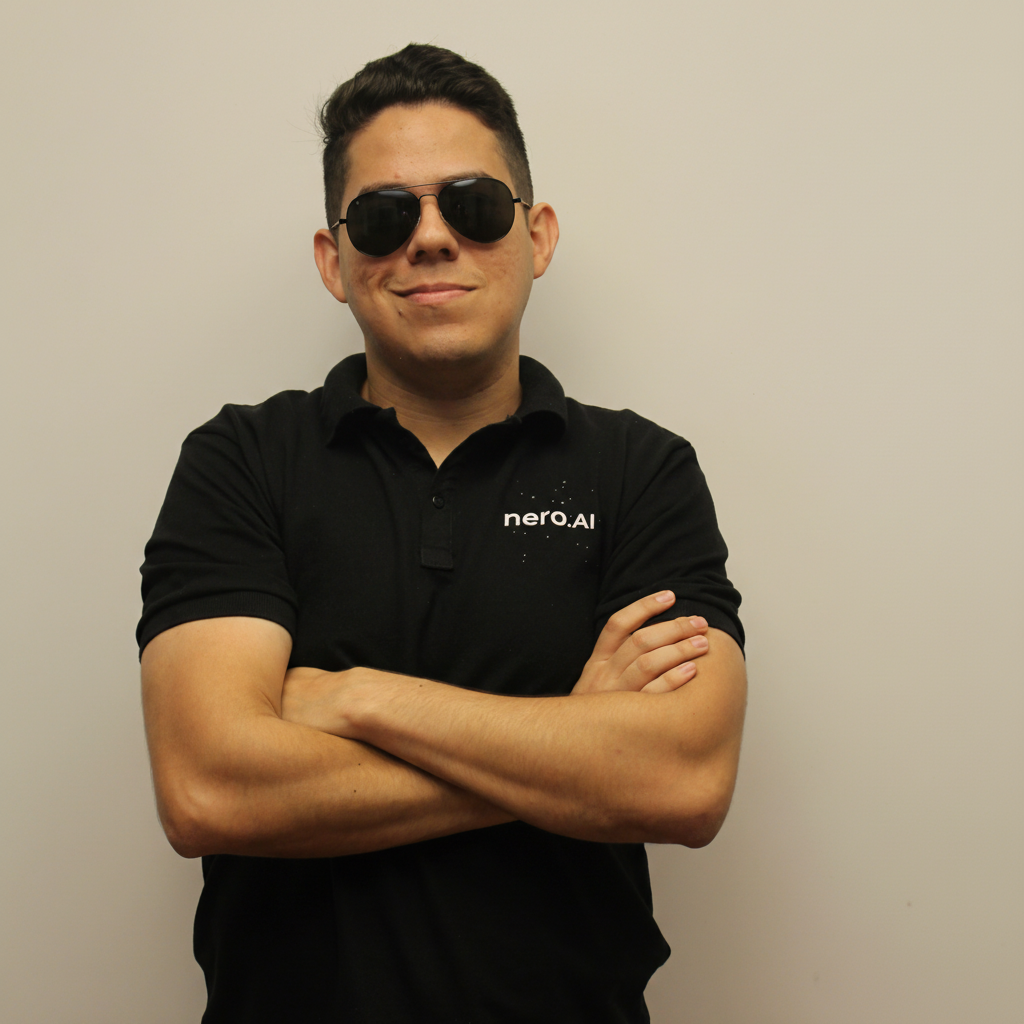

In [9]:
# 7) Sell product from query (imagem + texto do usuário)
url = f"{API_BASE}/sell-product-from-query"
files = {'image': ('valentim.JPG', read_image_bytes(USER_IMAGE), 'image/jpeg')}
data = {
    'text': "Gostaria de um óculos de sol para usar no verão.",
    'model_name': MODEL_NAME,
    'stream': False,
}
resp = requests.post(url, files=files, data=data)
print("Status:", resp.status_code)
if resp.ok:
    result = resp.json()
    display(Markdown(f"**Image ID:** {result.get('image_id')}"))
    display(Markdown("**Texto de venda gerado:**"))
    print(result.get('sell_text'))
    display_base64_image(result.get('image_base64'))
else:
    print(resp.text)

## Dicas
- Se a API retornar erro 500, verifique se o serviço está rodando e se a variável de ambiente `GEMINI_API_KEY` está configurada.
- Para mudar o produto consultado no passo 7, altere o texto em `data['text']`.
- Para salvar a imagem gerada no passo 7, você pode usar:
  ```python
  save_base64_image(result['image_base64'], f"sell_{result['image_id']}.png")
  ```